<Axes: xlabel='bairro_group', ylabel='price'>

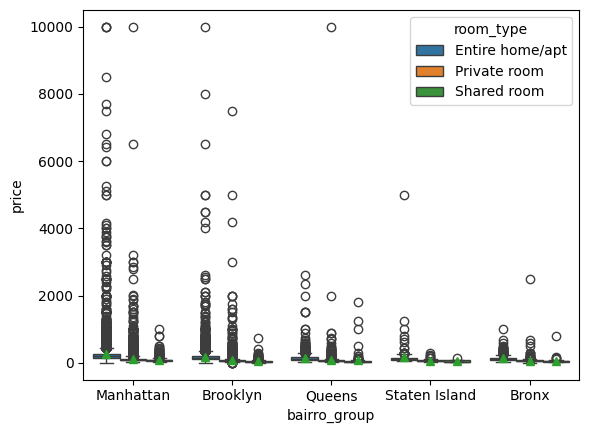

In [ ]:
sns.boxplot(data=df_1, x='bairro_group', y='price', hue='room_type', showmeans=True)

In [ ]:
q1_price = df_1.pivot_table(values='price', index='bairro_group', aggfunc=lambda x: x.quantile(0.25))
q3_price = df_1.pivot_table(values='price', index='bairro_group', aggfunc=lambda x: x.quantile(0.75))

iqr_price = q3_price - q1_price

inf_price = q1_price - 1.5*iqr_price
sup_price = q3_price + 1.5*iqr_price

In [ ]:
def filter_outliers(row):
    if row["price"] >= inf_price.loc[row["bairro_group"]].item() and row["price"] <= sup_price.loc[row["bairro_group"]].item():
        return True
    else:
        return False

In [ ]:
df_1 = df_1[df_1.apply(filter_outliers, axis=1)]

<Axes: xlabel='bairro_group', ylabel='price'>

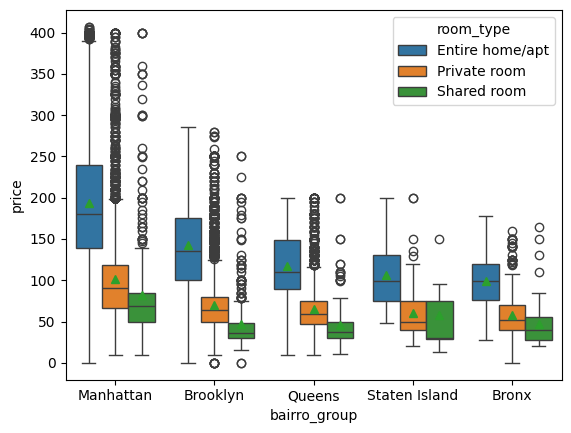

In [ ]:
sns.boxplot(data=df_1, x='bairro_group', y='price', hue='room_type', showmeans=True)